<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Implement_Basic_CNN_for_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load dataset
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train_full.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train_full.shape == (60000,)
assert y_test.shape == (10000,)


4422102/4422102 [==============================] - 1s 0us/step


In [3]:
#split training into validation
x_train, x_valid = x_train_full[:-5000], x_train_full[5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[5000:]

In [4]:
#build model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,  activation="relu"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(64,  activation="relu"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(10,  activation="softmax")]
)

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [6]:
import os

os.listdir()

['.config', 'drive', 'sample_data']

In [7]:
os.getcwd()

# Specify the path in Google Drive
drive_path = '/content/drive/MyDrive/Colab Notebooks/'

# Combine the paths for checkpoint saving
checkpoint_path = os.path.join(drive_path, "training_1/cp.ckpt")
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback =  tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)


In [ ]:
#DO NOT RUN THIS CELL
#training stopped at 7/10 epochs. gonna skip this cell and load the weights that were saved

history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, callbacks=[cp_callback])

Epoch 1/10
1719/1719 [==============================] - ETA: 0s - loss: 0.5838 - accuracy: 0.8015
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/training_1/cp.ckpt
1719/1719 [==============================] - 1098s 639ms/step - loss: 0.5838 - accuracy: 0.8015 - val_loss: 0.4733 - val_accuracy: 0.8260
Epoch 2/10
1719/1719 [==============================] - ETA: 0s - loss: 0.4730 - accuracy: 0.8387
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/training_1/cp.ckpt
1719/1719 [==============================] - 1090s 634ms/step - loss: 0.4730 - accuracy: 0.8387 - val_loss: 0.3592 - val_accuracy: 0.8698
Epoch 3/10
1719/1719 [==============================] - ETA: 0s - loss: 0.4260 - accuracy: 0.8544
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/training_1/cp.ckpt
1719/1719 [==============================] - 1032s 601ms/step - loss: 0.4260 - accuracy: 0.8544 - val_loss: 0.3583 - val_accuracy: 0.8650
Epoch 4/10
1719/1719 [=====================

In [8]:
model.load_weights(checkpoint_path)

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=3, callbacks=[cp_callback])

Epoch 1/3
1719/1719 [==============================] - ETA: 0s - loss: 0.3636 - accuracy: 0.8759
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/training_1/cp.ckpt
1719/1719 [==============================] - 921s 524ms/step - loss: 0.3636 - accuracy: 0.8759 - val_loss: 0.2844 - val_accuracy: 0.8911
Epoch 2/3
1719/1719 [==============================] - ETA: 0s - loss: 0.3534 - accuracy: 0.8769
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/training_1/cp.ckpt
1719/1719 [==============================] - 914s 532ms/step - loss: 0.3534 - accuracy: 0.8769 - val_loss: 0.2789 - val_accuracy: 0.8927
Epoch 3/3
1719/1719 [==============================] - ETA: 0s - loss: 0.3506 - accuracy: 0.8811
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/training_1/cp.ckpt
1719/1719 [==============================] - 895s 520ms/step - loss: 0.3506 - accuracy: 0.8811 - val_loss: 0.2730 - val_accuracy: 0.9000


In [10]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 37s 119ms/step - loss: 0.3427 - accuracy: 0.8815


In [11]:
score

[0.3426986634731293, 0.8815000057220459]

In [29]:
x_new = x_test[:12]
y_pred = model.predict(x_new)

1/1 [==============================] - 0s 67ms/step


In [30]:
#axis=1 max along row. axis=0 is along columns. i think this is vice versa in matlab??
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5])

In [31]:
y_pred.shape

(12, 10)

In [38]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


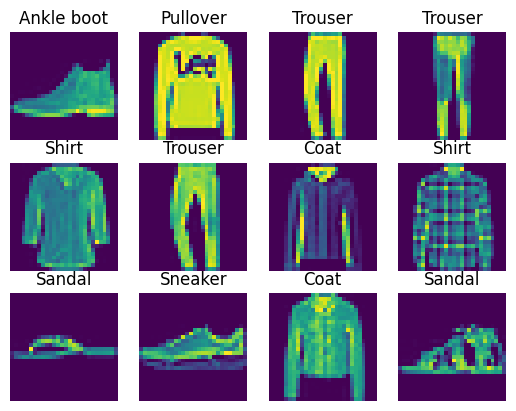

In [41]:

# Assuming you have x_new and predicted_labels
for row in range(3):  # Adjust the range based on your actual data size
    for col in range(4):  # Adjust the range based on your actual data size
        index = row * 4 + col
        plt.subplot(3, 4, index + 1)  # index starts at 1
        plt.imshow(x_new[index])
        plt.title(class_labels[y_pred_class[index]])
        plt.axis('off')  # Turn off axis labels for clarity

plt.show()
